<a href="https://colab.research.google.com/github/auliaardan/DataScience/blob/main/Central_Jakarta_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parse The Data**

---



In [1]:
#Import necessary library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests as rq
from bs4 import BeautifulSoup as BSP
import time
import math

#import ML Linear Regression Modeler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Variable to check evey page have been scraped
scrapedAll = False
locations = []
prices = []
luasTanahs = []
errorcounts = 0
scrapedRes = False

#How long it took to parse all the data
start = time.time()

#Use while loop to scrape data from all the pages
while not scrapedAll: 
#Scrape data from online house broker *LAMUDI
#Central Jakarta
    URL = "https://www.lamudi.co.id/jakarta/jakarta-pusat/house/buy/?page="
    #52 pages based from opening the website, put in For Loop
    for pagenum in range(1,52):
        page = rq.get(URL+str(pagenum))
        soup = BSP(page.content, 'html.parser')
        
        #Parse data that have the locations, prices, and luastanah, based on inspecting the webpage
        results = soup.find_all('div', class_="row ListingCell-row ListingCell-agent-redesign")

        for result in results:
            #Extract the data
            location = result.find('span', class_="ListingCell-KeyInfo-address-text")
            price = result.find('span', class_="PriceSection-FirstPrice")
            luasTanah = result.find('span', class_="KeyInformation-value_v2 KeyInformation-amenities-icon_v2 icon-land_size")
            
            #Add Them to List, using error handling
            #This method checks for each data, formats and finally append them to the list
            try:
                x = int(luasTanah.text.strip().strip('m²').strip())
            except(AttributeError, ):
                print("Attribute Error at luasTanahs ", len(luasTanahs))
                errorcounts += 1
                continue
            else:
                try:
                    y = int(price.text.strip().replace('.','').strip('Rp').strip())
                except(AttributeError, ):
                    print("Attribute Error at prices ", len(prices))
                    errorcounts += 1
                    continue
                else:
                    try:
                        z = location.text.strip().replace('\n','').strip().strip()
                    except(AttributeError, ):
                        print("Attribute Error at locations in ", len(locations))
                        errorcounts += 1
                        continue
                    else:
                        luasTanahs.append(x)
                        prices.append(y)
                        locations.append(z)
    end = time.time()
    print('Finished scraping, took the computer', end-start,'seconds')
    scrapedAll = True
print()
print('-'*20)    
print()
print('Jumlah rumah yang tidak ke-ekstrak', errorcounts)
scaler = StandardScaler()

Attribute Error at luasTanahs  196
Attribute Error at luasTanahs  333
Attribute Error at luasTanahs  516
Attribute Error at luasTanahs  866
Attribute Error at prices  929
Attribute Error at luasTanahs  1082
Attribute Error at luasTanahs  1149
Attribute Error at luasTanahs  1429
Attribute Error at luasTanahs  1464
Finished scraping, took the computer 46.810675859451294 seconds

--------------------

Jumlah rumah yang tidak ke-ekstrak 9


**Inspect the data**


---



In [2]:
#Import Pandas and Seaborn
import pandas as pd
import seaborn as sns

In [6]:
#put the list into a dict
parsed_dict = { 'location' : locations, 'price': prices, 'land_size': luasTanahs }
#convert into dataframe
df = pd.DataFrame(parsed_dict)

In [7]:
df.head(5)

,location,price,land_size
0,"Menteng, Jakarta Pusat",65000000000,813
1,"Sawah Besar, Jakarta Pusat",1320000000,41
2,"Senen, Jakarta Pusat",325000000,14
3,"Kwitang, Jakarta Pusat",1195000000,45
4,"Senen, Jakarta Pusat",755000000,22


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   1521 non-null   object
 1   price      1521 non-null   int64 
 2   land_size  1521 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 35.8+ KB


In [9]:
df.describe()

,price,land_size
count,1.521000e+03,1521.000000
mean,1.413061e+10,265.946746
std,2.583256e+10,281.273395
min,1.500000e+08,14.000000
25%,1.500000e+09,80.000000
50%,4.000000e+09,167.000000
75%,1.000000e+10,328.000000
max,2.750000e+11,2951.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


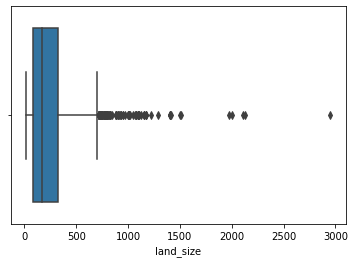

In [12]:
sns.boxplot(df.land_size)

In [14]:
#Compress and save dataframe into CSV
compression_opts = dict(method='zip', archive_name='Central_Jakarta_House_Info.csv')  
df.to_csv('Datasets.zip', index=False, compression=compression_opts)

**Processing the Data**

---



In [15]:
#Import necessary packages
from sklearn.svm import SVR

In [16]:
#Initialize SVR
svr = SVR()

In [20]:
#Split the datafile
X = df[['land_size']]
y = df[['price']]

In [22]:
#Prep for SVR
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
svr.score(X_test, y_test)

-0.1648371435333038

In [25]:
Svr_predict = svr.predict(X_test)

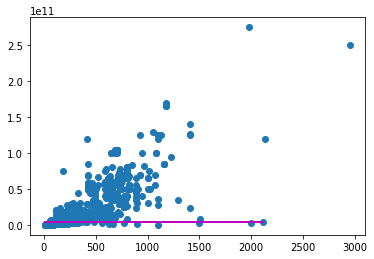

In [29]:
#Plot using SVR
plt.scatter(X, y)
plt.plot(X_test, Svr_predict, color = 'm')

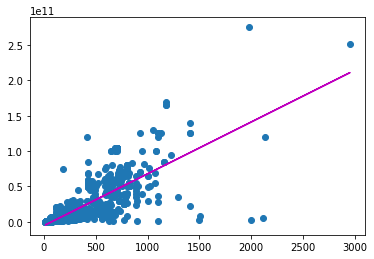

In [31]:
#Plot using Linreg
linreg = LinearRegression()

plt.scatter(X, y)
plt.plot(X, linreg.fit(X, y).predict(X), color = 'm')

In [32]:
linreg.score(X, y)

0.6357611420157273

Using SVR, the model is unable to find the best fit from the data.



---

**End Of Analysis**


In [ ]:
#Unused Code
if(len(prices) == len(luasTanahs)):
    
    print('jumlah rumah yang dijual ', len(prices)+errorcounts)
    print('Harga termahal ', max(prices), 'dan termurah', min(prices))
    
    data_tanah_price = np.array((luasTanahs, prices))
    
    scaler.fit(data_tanah_price)
    data_tanah_price = scaler.transform(data_tanah_price)
    
    land_size = data_tanah_price[0,:]
    house_price = data_tanah_price[1,:]
    print(land_size)
    print(house_price)
    
    #menampilkan scatter plot dari dataset
    #x,y
    #plt.scatter(land_size, house_price)
    
    #Latih model dengan linear regression fit()
    linreg = LinearRegression()
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    linreg.fit(X_train, y_train)
    price_predict = linreg.predict(X_test)
    
    # menampilkan plot hubungan antara jumlah kamar dengan harga rumah
    plt.scatter(land_size, house_price)
    plt.plot(land_size, price_predict)
    
else:
    print("Price and Land Size not same size")